# Explanation

This code takes registered images and applies a form of pixel-by-pixel colocalization analysis known as Spatially Adaptive Colocalization Analysis (SACA).  The theory behind SACA can be found here: https://arxiv.org/abs/1711.00069 

SACA was developed for analyzing dual-channel microscopy images, where two different types of fluorescent probes are employed in the same sample.  The resulting microsocpy images are pre-registered, and each spatial point corresponds exactly.  

Here, I attempted to apply SACA to registered multimodal images.  These multimodal images were taken on different instruments, and had to be pre-registered using another script.

The results do not seem to be promising.  This method may not be suited to registered multimodal images, or the poor results can be because of mis-registration.  Unfortunately, my attempts at getting better registered images have not improved the results very much.

## Loading R packages

SACA is based in R, requiring an R package to work.

In [2]:
.libPaths('C:/Program Files/R/R-3.4.3/library')
suppressWarnings(library("RKColocal"))

Loading required package: pcaPP
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: EBImage
Loading required package: abind

Attaching package: 'abind'

The following object is masked from 'package:EBImage':

    abind

Loading required package: grid
Loading required package: ggplot2
Loading required package: reshape2
Loading required package: rJava


# Polarimetry to MMP

First I compore Polscope polarimetry to Mueller Matrix Polarimetry.

## Reading in the composite image

The registered image is saved as a dual-channel tif.


In [3]:
img = suppressWarnings(readImage("F:/Box Sync/Research/Polarimetry/RAnalysis/WP4/Composite-JupyterAffinePyramid.tif"))
pol = imageData(img)[,,1]
mmp = imageData(img)[,,2]

## Normalizing the images to 0-1

SACA requires each image channel to be normalized from 0-1.

In [4]:
polNorm = (pol - min(pol))/(max(pol)-min(pol))
mmpNorm = (mmp-min(mmp))/(max(mmp)-min(mmp))

## Visualize the two images

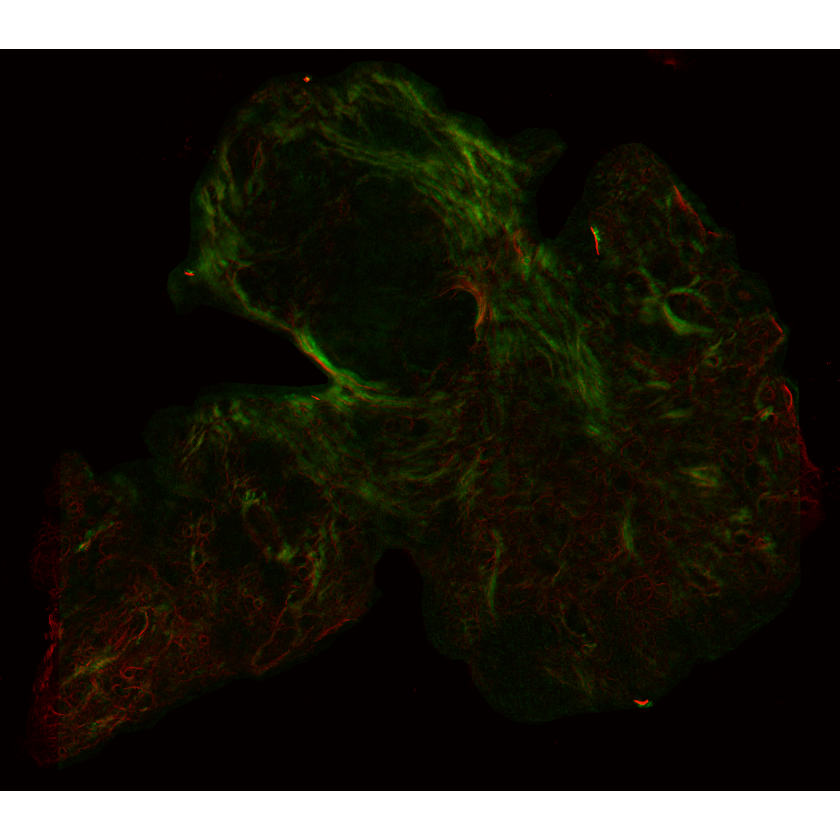

In [5]:
DualImageVisual(polNorm,mmpNorm,isSplit=FALSE)

## Analyze images for colocalization

Warning message in colocalpixel(mmpNorm, polNorm, method = "trunkendall"):
"method should be one of "bonferroni""

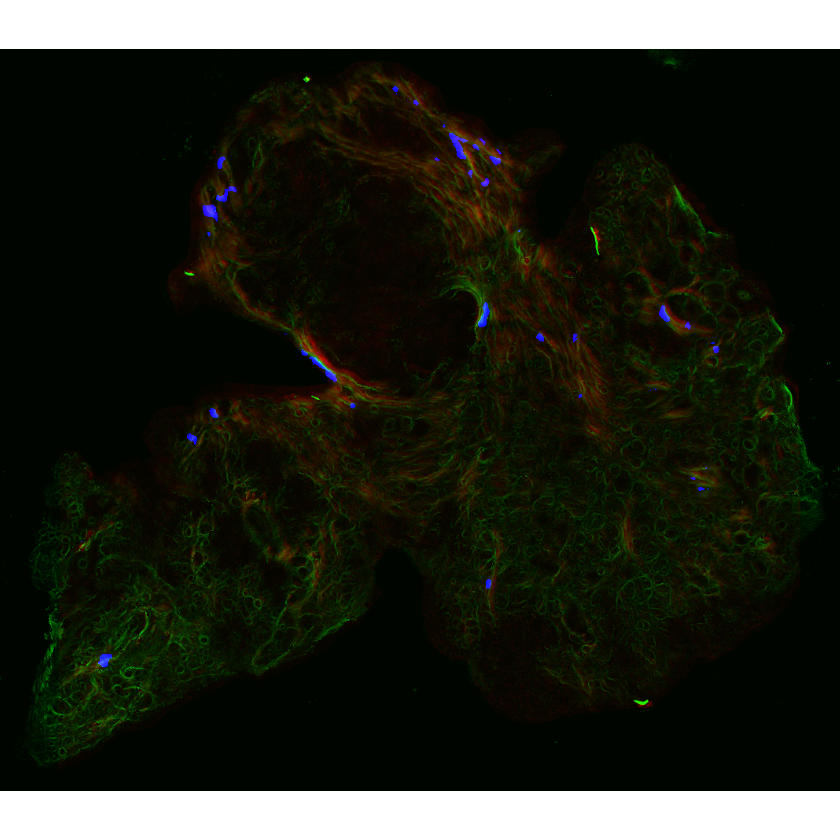

In [6]:
colocAnalysis <- colocalpixel(mmpNorm,polNorm, method = 'trunkendall')
plot(colocAnalysis)

# Polarimetry to SHG

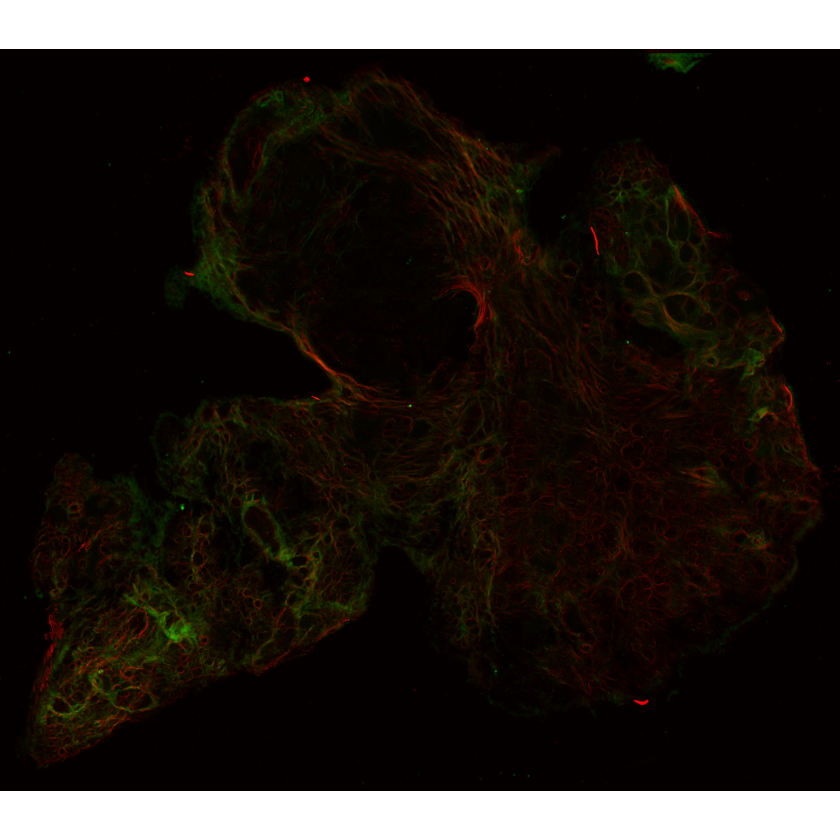

In [10]:
img = suppressWarnings(readImage("F:/Box Sync/Research/Polarimetry/RAnalysis/WP4/wekaSHG-affine-0_1evo-Mean.tif"))
shg = imageData(img)
shgNorm = (shg-min(shg))/(max(shg)-min(shg))
DualImageVisual(polNorm,shgNorm,isSplit=FALSE)

Warning message in colocalpixel(polNorm, shgNorm, method = "trunkendall"):
"method should be one of "bonferroni""

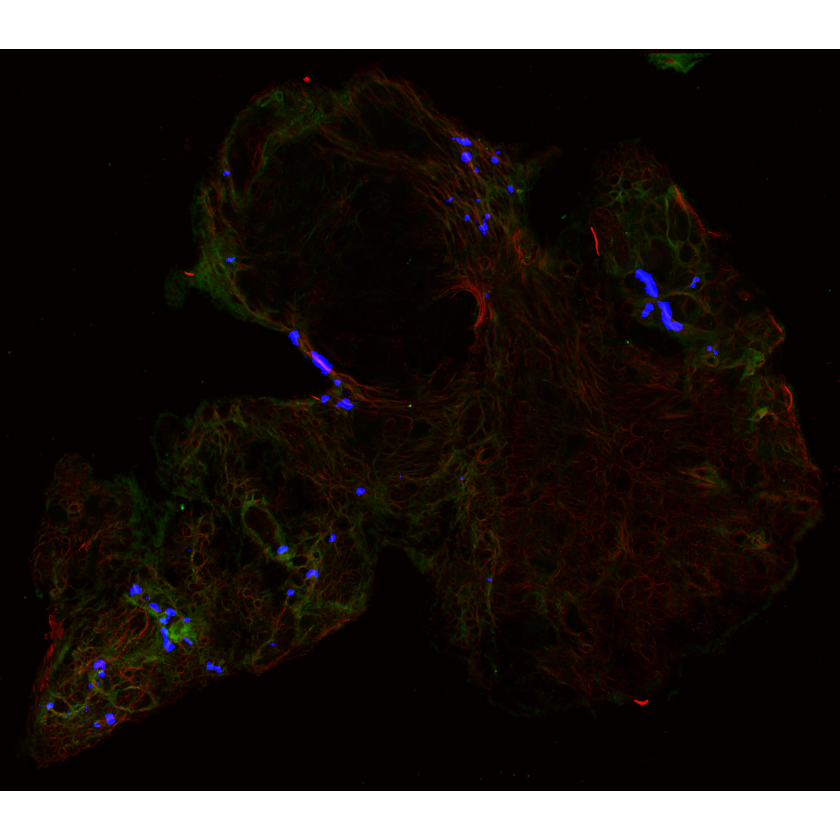

In [13]:
polToShg <- colocalpixel(polNorm,shgNorm, method = 'trunkendall')
plot(polToShg)